# Investigating Fandango Movie Ratings

a brief investigation into movie ratings from fandango review site, comparing pre and post [Hickey's analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/) conducted in october 2015

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange

%matplotlib inline

In [2]:
dfA = pd.read_csv('fandango_score_comparison.csv')
dfB = pd.read_csv('movie_ratings_16_17.csv')

In [10]:
dfA_sub = dfA[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
dfA_sub.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [12]:
dfB_sub = dfB[['movie', 'year', 'fandango']]
dfB_sub.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


A, [fandango_score_comparison.csv](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015

B, [movie_ratings_16_17.csv](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017

A having been pulled in 2015 will not contain any of the movies released in 2016 or 2017  which is all that B contains. Therefore the two data sets are mutually exclusive.
A will contain data pre Hickey's review whereas B contains data exclusively after his review. Neither have been randomly sampled as both focus on the popular movies or ones with lots of reviews, likely to be the popular ones.

## New Goal: 
It is not possible to fairly compare fandango scores pre & post Hickey's Review, instead we will look at Fandango ratings or popular movies pre & post the review

### Do both samples contain 'popular' movies?

using the definition of more than 30 fandango fan reviews as popular, its easy to check the first data set...

In [13]:
sum(dfA_sub['Fandango_votes'] < 30)

0

not so easy to check for the second as the number of fan reviews is not contained in the data, instead we will check a random sample manually

In [16]:
dfB_sub.sample(10, random_state = 0)

,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


As of Oct 2018

| Movie | Fan Reviews | 
| --- | --- | 
| The Take (Bastille Day) | 29 |
| Come and Find Me | 2 |
| Kickboxer | 13 |
| The Founder | 1033 |
| The Darkness | 911 |
| Ice Age: Collision Course | 2242 |
| Lion | 3706 |
| Ride Along 2 | 6662 |
| A Monster Calls | 500 |
| Jane Got a Gun | 365 |

only **70%** of our  random sample meet the definition of popular. Seriously starting to doubt the validity of these data sets as an equal comparison.

### Isolating years

In [17]:
dfB_sub['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [20]:
dfB_sub16 = dfB_sub[dfB_sub['year'] == 2016]
dfB_sub16.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [21]:
dfA_sub.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


for the other data set, there is no isolated column for year so we will first have to create one

In [23]:
dfA_sub['year'] = dfA_sub['FILM'].str[-5:-1]
dfA_sub.head(2)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [24]:
dfA_sub['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [26]:
dfA_sub15 = dfA_sub[dfA_sub['year'] == '2015']
dfA_sub15.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


## Start the Analysis

([<matplotlib.axis.XTick at 0x7f927c86e0f0>,
 <a list of 11 Text xticklabel objects>)

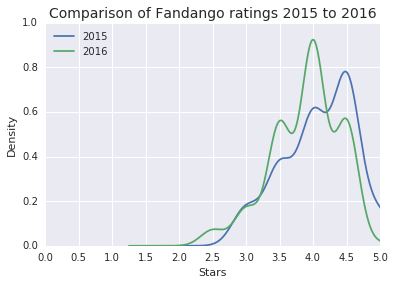

In [44]:
dfA_sub15['Fandango_Stars'].plot.kde(label = '2015')
dfB_sub16['fandango'].plot.kde(label = '2016')
plt.legend(loc = 2)
plt.title('Comparison of Fandango ratings 2015 to 2016', fontsize = 14)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))

both distributions are negatively skewed and hold aproximately the same shape however, 2016 appears to have been shifted slightly left with its peak and the tail both 0.5 further left. Implying that they have shifted their scores slightly. 

In [49]:
dfA_sub15['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [50]:
dfB_sub16['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


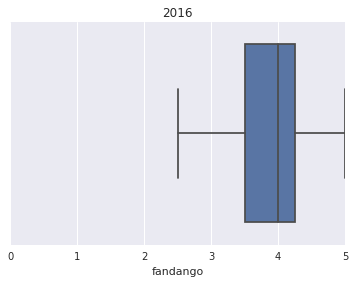

In [55]:
sns.boxplot(x = 'fandango', data = dfB_sub16)
plt.xlim(0,5)
plt.title('2016')

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


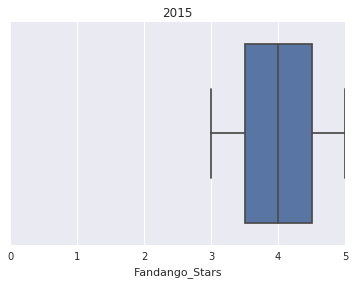

In [57]:
sns.boxplot(x = 'Fandango_Stars', data = dfA_sub15)
plt.xlim(0,5)
plt.title('2015')

In [60]:
dfA_sub15['Fandango_Stars'].median()

4.0

In [61]:
dfB_sub16['fandango'].mean()

3.887434554973822